# Logistic Regression
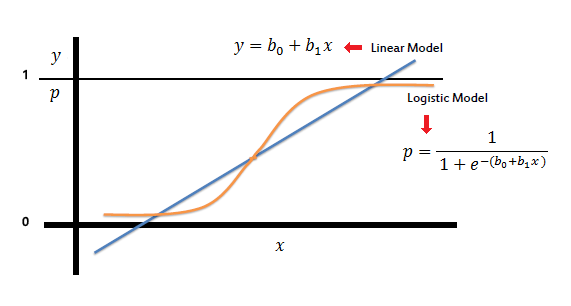

- Logistic regression is a supervised learning algorithm used for binary classification problems. 
- It models the probability that an input belongs to a particular class. 
- The output of logistic regression is a probability score between 0 and 1, which can be interpreted as the likelihood of the input belonging to a certain class.

The logistic regression model applies a logistic (or sigmoid) function to a linear combination of input features, which transforms the output into a probability. The logistic function is defined as:
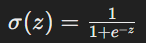
where z is the linear combination of input features and coefficients:



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
# Load the Iris dataset
iris = load_iris()
X, y = iris.data[:,:2], iris.target

In [3]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)  # Increase max_iter for convergence
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

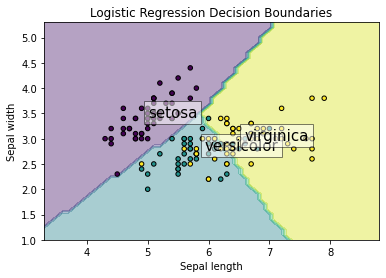

In [5]:
# Create a meshgrid to plot decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = logistic_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Add labels to the classes
for i, label in enumerate(iris.target_names):
    plt.text(X[y == i, 0].mean(), X[y == i, 1].mean(), label,
             color='black', size=15, bbox=dict(facecolor='white', alpha=0.5))
    
# Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Logistic Regression Decision Boundaries')
plt.show()

In [6]:
# Predictions
y_pred = logistic_model.predict(X_test)

In [7]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9


In [8]:

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


In [9]:
classification_rep = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.88      0.78      0.82         9
   virginica       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

